In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings(action = 'ignore')

# Import cleaned data.

In [2]:
df = pd.read_csv('../Data/Cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,1.0,6.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,2.0,6.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,2,3.0,6.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,4.0,6.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,4,5.0,6.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Unnamed: 0     0
day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [7]:
df1 = df.copy()

In [8]:
df1.drop(columns = ['day', 'month', 'Unnamed: 0'], axis = 1, inplace = True)

In [9]:
df1.head(6)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
5,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire


# Split dataset.

In [10]:
df1 = pd.get_dummies(df1)

In [11]:
x = df1.drop(['FWI'],axis=1)
y = df1['FWI']

In [12]:
# separate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)
x_train.shape, x_test.shape

((182, 11), (61, 11))

In [13]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes_fire,Classes_not fire
Temperature,1.000000,-0.649080,-0.311146,-0.331932,0.670307,0.481222,0.373144,0.598566,0.457992,0.529303,-0.529303
RH,-0.649080,1.000000,0.248706,0.220882,-0.660272,-0.458180,-0.283704,-0.693034,-0.410023,-0.442602,0.442602
Ws,-0.311146,0.248706,1.000000,0.295181,-0.228128,-0.043721,0.026699,-0.019627,-0.020985,-0.109629,0.109629
Rain,-0.331932,0.220882,0.295181,1.000000,-0.495051,-0.253520,-0.275646,-0.313091,-0.266224,-0.337809,0.337809
FFMC,0.670307,-0.660272,-0.228128,-0.495051,1.000000,0.618119,0.542998,0.741244,0.612815,0.791622,-0.791622
DMC,0.481222,-0.458180,-0.043721,-0.253520,0.618119,1.000000,0.874451,0.711776,0.984766,0.605103,-0.605103
DC,0.373144,-0.283704,0.026699,-0.275646,0.542998,0.874451,1.000000,0.556031,0.943777,0.563553,-0.563553
ISI,0.598566,-0.693034,-0.019627,-0.313091,0.741244,0.711776,0.556031,1.000000,0.677100,0.721267,-0.721267
BUI,0.457992,-0.410023,-0.020985,-0.266224,0.612815,0.984766,0.943777,0.677100,1.000000,0.609626,-0.609626
Classes_fire,0.529303,-0.442602,-0.109629,-0.337809,0.791622,0.605103,0.563553,0.721267,0.609626,1.000000,-1.000000


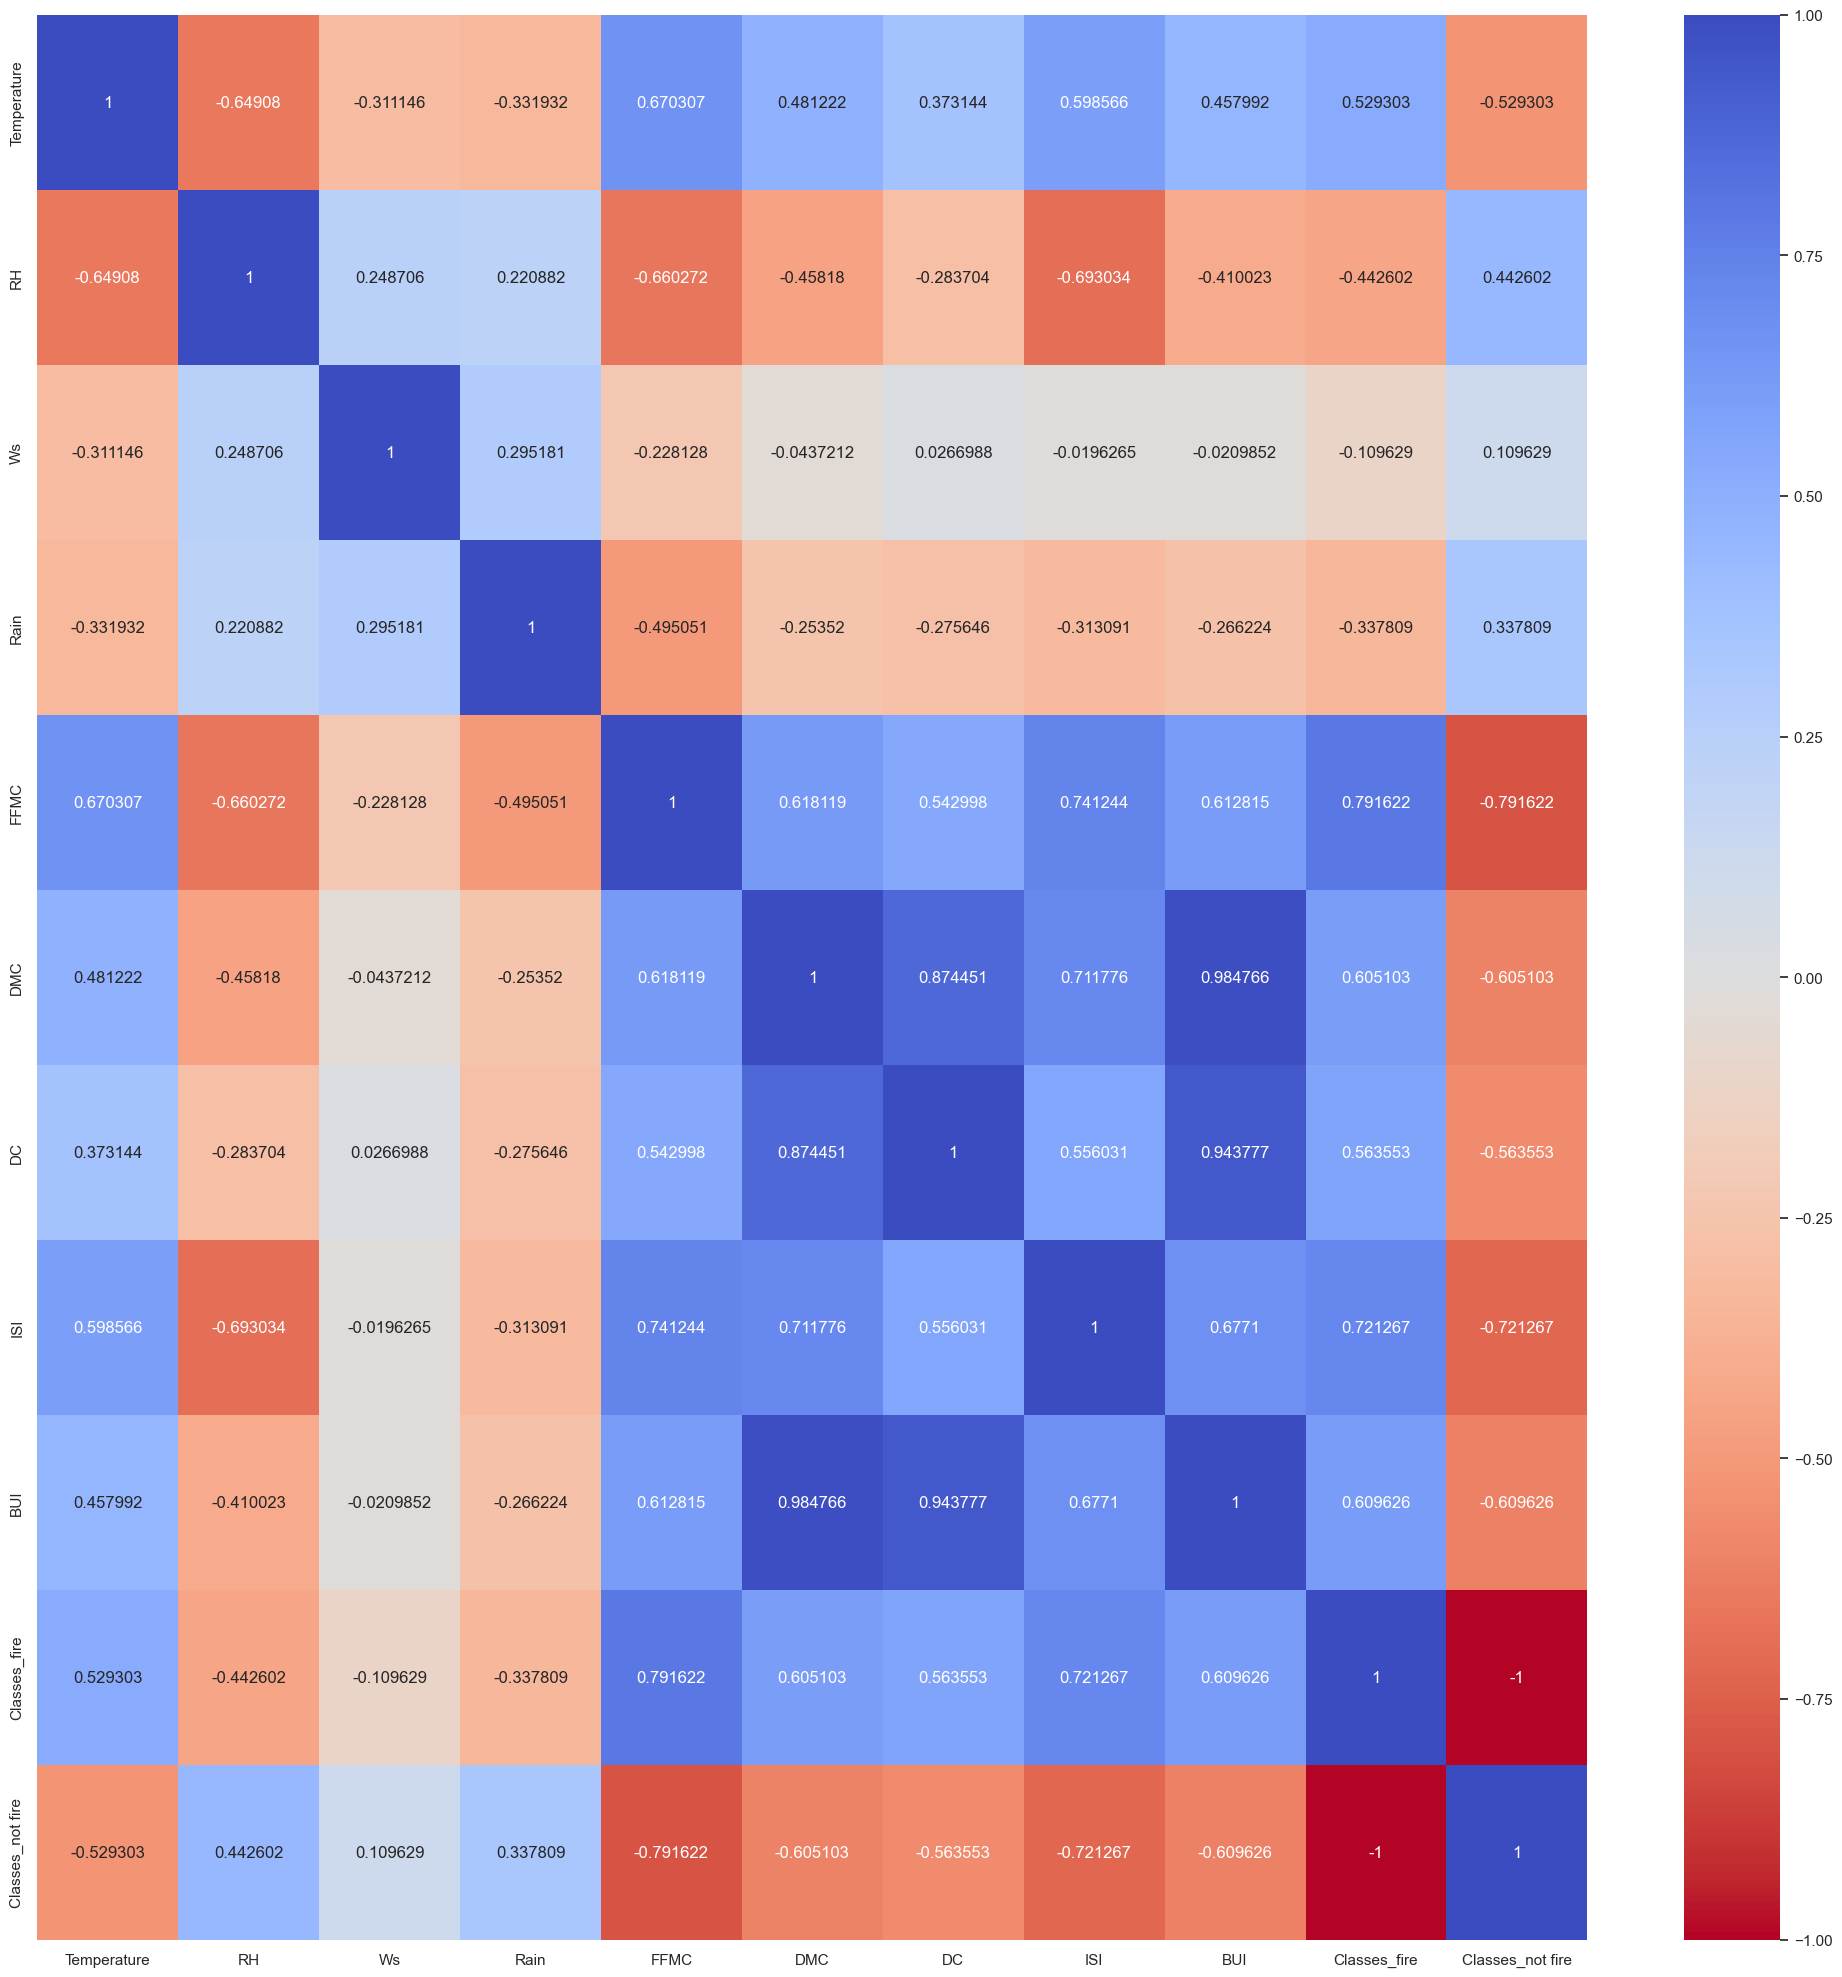

In [14]:
sns.set()
plt.figure(figsize = (25, 25))
sns.heatmap(x_train.corr(), annot = True, cmap = "coolwarm_r" , fmt = 'g')
plt.show()

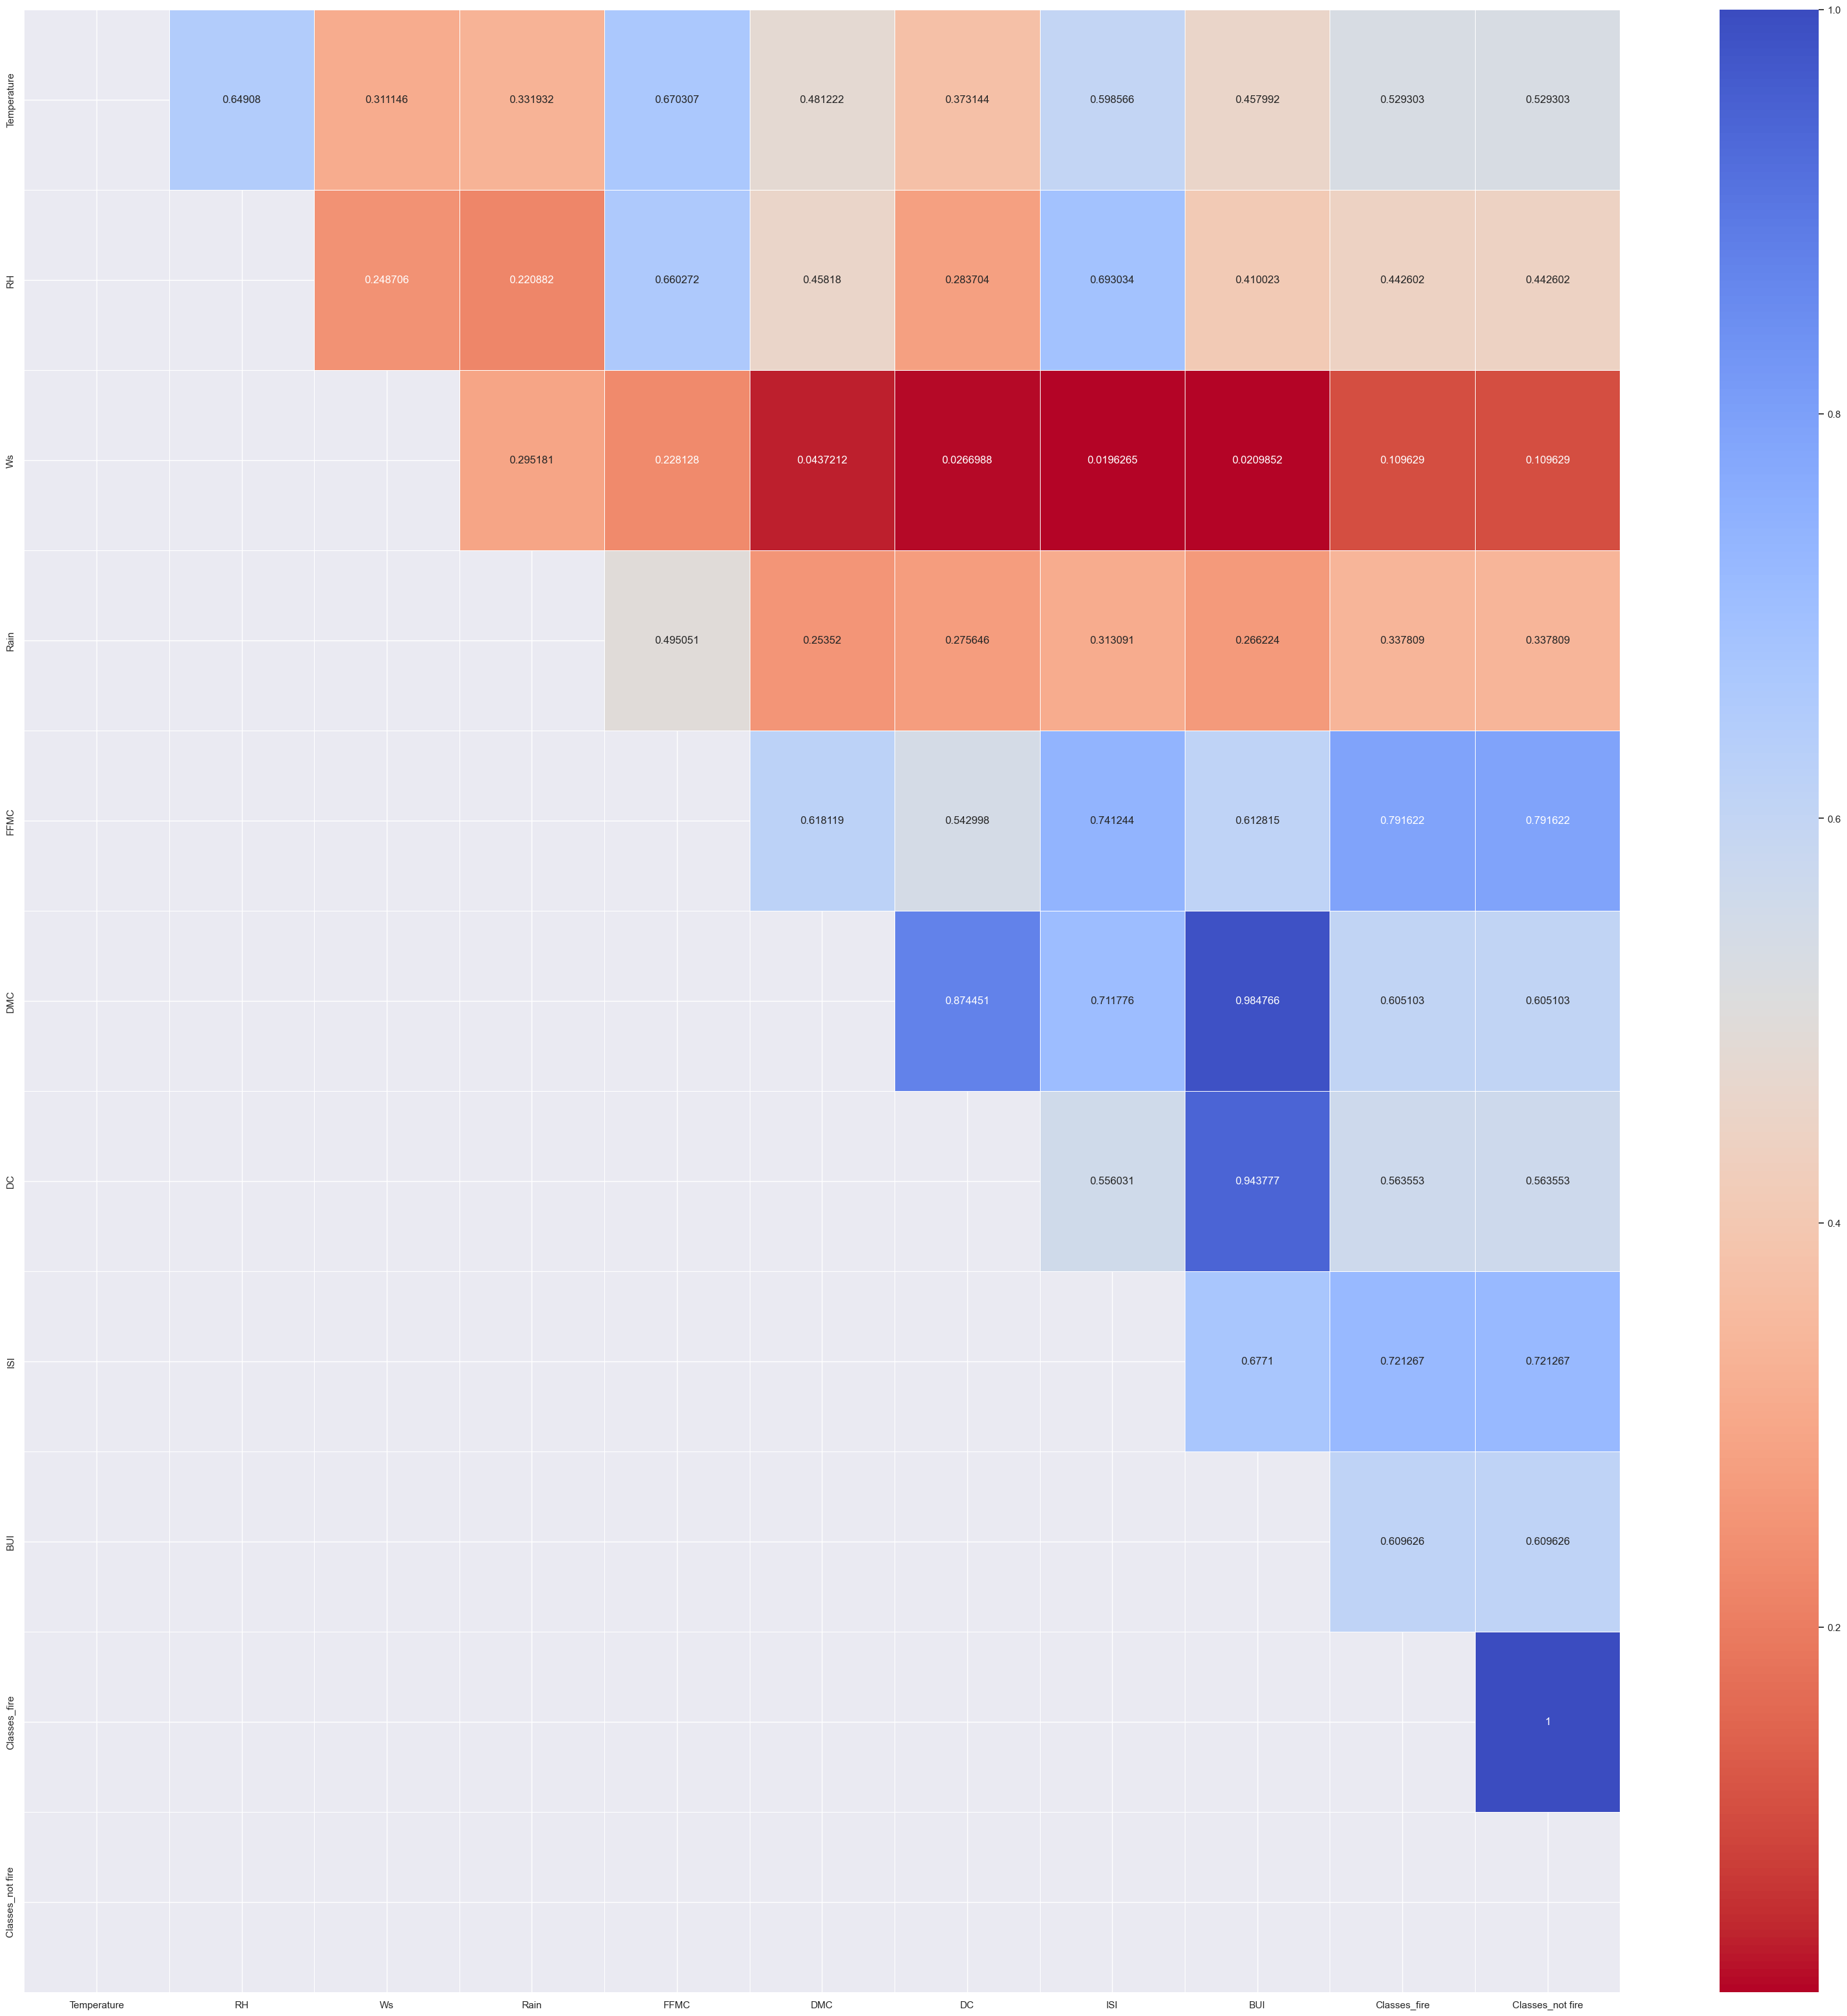

In [14]:
corr = x_train.corr().abs()

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

sns.set()
plt.figure(figsize = (40, 40))
sns.heatmap(upper, annot = True, linewidths = 0.6, cmap = "coolwarm_r", fmt = 'g')
plt.show()

In [15]:
to_drop = list(column for column in upper.columns if any(upper[column] > 0.75))

list(to_drop)

['DC', 'BUI', 'Classes_fire', 'Classes_not fire']

In [16]:
x_train.drop(columns = to_drop, axis = 1, inplace = True)
x_test.drop(columns = to_drop, axis = 1, inplace = True)

In [17]:
x_train.shape, x_test.shape

((182, 7), (61, 7))

# Scaling data

In [18]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [20]:
x_train1 = sc.transform(x_train) 
x_test1 = sc.transform(x_test)

In [21]:
x_train_sc = pd.DataFrame(data = x_train1, columns = x_train.columns)
x_test_sc = pd.DataFrame(data = x_test1, columns = x_test.columns)

In [22]:
x_train.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI
171,36.0,29.0,18.0,0.0,93.9,39.6,18.5
176,35.0,58.0,10.0,0.2,78.3,10.8,1.6
214,28.0,67.0,19.0,0.0,75.4,2.9,2.0


In [23]:
x_test.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI
55,36.0,53.0,19.0,0.0,89.2,17.1,10.0
218,34.0,71.0,14.0,6.5,64.5,3.3,1.0
227,32.0,51.0,13.0,0.0,88.7,16.0,6.9


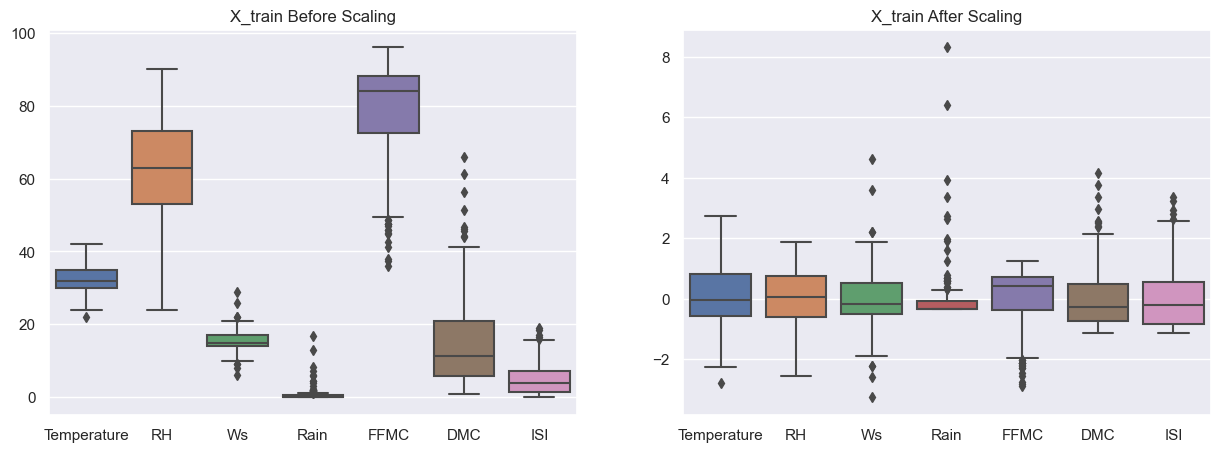

In [25]:
sns.set()
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = x_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data = x_train_sc)
plt.title('X_train After Scaling')
plt.show()

# Model building.

In [27]:
def func (x, y):
    algoritm = {
        'KNeighborsRegressor' : {
            'model' : KNeighborsRegressor(),
            "param_grid" : {
                'n_neighbors': [3, 5, 7],  
                'weights': ['uniform', 'distance']    
            }
        },
        
        'DecisionTreeRegressor' : {
            'model' : DecisionTreeRegressor(),
            "param_grid" : {
                'criterion': ['mse', 'friedman_mse'],
                'max_depth': [5, 10],
                'min_samples_split': [2, 5], 
            }
        },
        
        'RandomForestRegressor' : {
            'model' : RandomForestRegressor(),
            "param_grid" : {
                'n_estimators': [100, 200, 300],
                'min_samples_split': [2, 5, 10]
            }
        },
        
        'SVR' : {
            'model' : SVR(),
            "param_grid" : {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.1, 1.0],
                'gamma': ['scale', 'auto']
            }
        }
    }
    
    alg = []
    best_score = []
    best_param = []
    
    cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)

    
    for i, j in algoritm.items():
        gsc = GridSearchCV(j['model'], j['param_grid'], cv = cv)
        gsc.fit(x, y)
        print("\n", i ,"algorithm")
        print("\n \t Best score : ", gsc.best_score_)
        print("\n \t Best parameter : ", gsc.best_params_)
        
        alg.append(i)
        best_score.append(gsc.best_score_)
        best_param.append(gsc.best_params_)
        
    adf = pd.DataFrame({'Algorithms' : alg, 'Best Score' : best_score, 'Best parameters' : best_param})
        
    return adf

In [ ]:
adf = func(x_train, y_train)


 KNeighborsRegressor algorithm

 	 Best score :  0.9513035845958328

 	 Best parameter :  {'n_neighbors': 5, 'weights': 'distance'}

 DecisionTreeRegressor algorithm

 	 Best score :  0.9420405461733432

 	 Best parameter :  {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_split': 2}

 RandomForestRegressor algorithm

 	 Best score :  0.9693737446748343

 	 Best parameter :  {'min_samples_split': 2, 'n_estimators': 100}
